This goal of the notebook is to show some properties of SVM classifier. SVM was trained using sklearn class LinearSVC on Iris data set. In the notebook I trained SVM classifier on scaled data and after multiplied one feature by 10. To show how different are decision boundaries I've made visualisation.

In [22]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
import numpy as np
%matplotlib inline

In [23]:
iris = datasets.load_iris()
X = iris["data"][:,(2,3)]
y = (iris["target"])

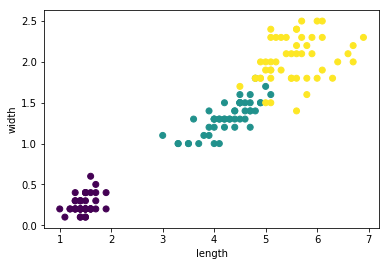

In [24]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.xlabel("length")
plt.ylabel("width")

In [25]:
#training phase with scaling 
svm_clf = Pipeline([
        ("scaler",StandardScaler()),
        ("linear_svc",LinearSVC(C=10,loss="hinge",max_iter=10000))
    ])
svm_clf.fit(X,y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=10000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))])

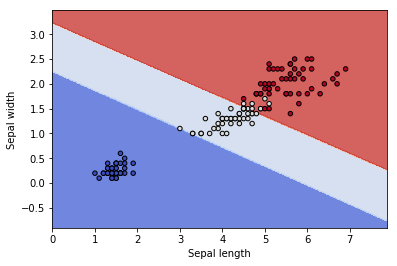

In [26]:

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

# Set-up 2x2 grid for plotting.
fig, ax = plt.subplots(1, 1)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, svm_clf, xx, yy,
              cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xlabel('Sepal length')
ax.set_ylabel('Sepal width')
# ax.set_xticks(())
# ax.set_yticks(())

In [27]:
#training phase without scaling
X_0_rescaled = X.copy()
X_0_rescaled[:,0] = X[:,0]*10
svm_clf = Pipeline([
        ("linear_svc",LinearSVC(C=10,loss="hinge",max_iter=10000))
    ])
svm_clf.fit(X_0_rescaled,y)

/usr/local/lib/python3.5/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(memory=None,
     steps=[('linear_svc', LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=10000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))])

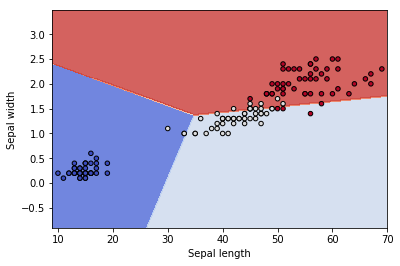

In [28]:
# Set-up 2x2 grid for plotting.
fig, ax = plt.subplots(1, 1)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X_0_rescaled[:, 0], X_0_rescaled[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, svm_clf, xx, yy,
              cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xlabel('Sepal length')
ax.set_ylabel('Sepal width')

/usr/local/lib/python3.5/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


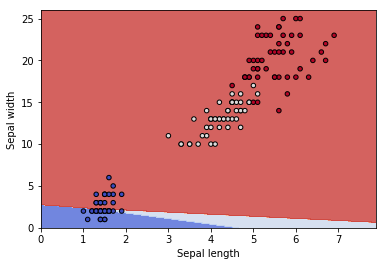

In [29]:
#training phase without scaling
X_1_rescaled = X.copy()
X_1_rescaled[:,1] = X[:,1]*10
svm_clf = Pipeline([
        ("linear_svc",LinearSVC(C=10,loss="hinge",max_iter=10000))
    ])
svm_clf.fit(X,y)
fig, ax = plt.subplots(1, 1)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X_1_rescaled[:, 0], X_1_rescaled[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, svm_clf, xx, yy,
              cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xlabel('Sepal length')
ax.set_ylabel('Sepal width')

Conclusion: In SVM classifier it is needed to normalize features. SVM tries to find out what is the widest "street" which separate different classes. If the features will be in different scale one of them will impact much more decision boundary than the other one, hence algorithm will be trying to optimie by one feature. 